# Trabalho 02 - Fundamentos de Análise de Dados

# Classificação - Concrete Cracks

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## 2 Leitura dos Dados

Esse dados representam as 40 mil imagens, colocadas em um dataframe que foi criado no notebook `t02_data_manipulation.ipynb`.

In [5]:
dados = pd.read_parquet("https://github.com/diascarolina/fundamentos-analise-dados/blob/main/trabalho02_classificacao/df_total.parquet?raw=true")
dados

,arquivo,classe,0,1,2,3,4,5,6,7,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,16679_1.jpg,1,170.0,174.0,177.0,172.0,167.0,161.0,156.0,161.0,...,176.0,188.0,168.0,96.0,67.0,77.0,136.0,166.0,175.0,171.0
1,04354.jpg,1,183.0,186.0,191.0,187.0,178.0,179.0,182.0,181.0,...,186.0,183.0,181.0,182.0,183.0,184.0,184.0,185.0,182.0,181.0
2,02725.jpg,1,158.0,158.0,160.0,149.0,149.0,157.0,155.0,150.0,...,185.0,184.0,194.0,190.0,192.0,182.0,181.0,179.0,198.0,190.0
3,11369_1.jpg,1,187.0,187.0,190.0,192.0,196.0,195.0,201.0,216.0,...,193.0,188.0,194.0,196.0,187.0,191.0,190.0,190.0,188.0,190.0
4,19463.jpg,1,176.0,174.0,174.0,162.0,71.0,166.0,206.0,170.0,...,183.0,182.0,176.0,171.0,184.0,176.0,179.0,185.0,174.0,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,11026.jpg,0,166.0,172.0,183.0,174.0,142.0,153.0,144.0,161.0,...,194.0,192.0,187.0,189.0,188.0,184.0,197.0,187.0,187.0,191.0
39996,05053.jpg,0,175.0,172.0,175.0,172.0,170.0,170.0,166.0,164.0,...,167.0,170.0,176.0,171.0,168.0,169.0,168.0,170.0,171.0,164.0
39997,15240.jpg,0,161.0,161.0,162.0,161.0,163.0,161.0,162.0,162.0,...,164.0,164.0,164.0,165.0,163.0,163.0,166.0,164.0,163.0,161.0
39998,03422.jpg,0,213.0,212.0,202.0,206.0,209.0,207.0,208.0,207.0,...,206.0,202.0,215.0,230.0,205.0,192.0,189.0,193.0,188.0,189.0


In [6]:
# embaralhar os dados para não ficarem divididos pelas classes
dados = dados.sample(frac=1, random_state=12).reset_index(drop=True)

In [7]:
dados

,arquivo,classe,0,1,2,3,4,5,6,7,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,08065.jpg,0,187.0,187.0,190.0,187.0,185.0,186.0,190.0,185.0,...,168.0,169.0,168.0,167.0,166.0,166.0,166.0,165.0,166.0,173.0
1,03159.jpg,0,181.0,175.0,168.0,175.0,178.0,176.0,183.0,178.0,...,184.0,179.0,166.0,163.0,161.0,178.0,181.0,184.0,186.0,185.0
2,13193_1.jpg,1,214.0,216.0,218.0,218.0,219.0,223.0,221.0,218.0,...,214.0,215.0,214.0,213.0,215.0,207.0,208.0,206.0,207.0,212.0
3,03741.jpg,1,190.0,192.0,187.0,188.0,194.0,188.0,183.0,181.0,...,61.0,70.0,66.0,92.0,149.0,182.0,190.0,192.0,193.0,194.0
4,19779.jpg,1,93.0,59.0,89.0,131.0,151.0,152.0,154.0,152.0,...,160.0,163.0,164.0,161.0,164.0,161.0,157.0,161.0,156.0,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,06478.jpg,1,120.0,117.0,111.0,117.0,116.0,118.0,113.0,110.0,...,113.0,121.0,117.0,117.0,125.0,129.0,125.0,128.0,130.0,121.0
39996,08014.jpg,0,187.0,184.0,180.0,185.0,191.0,181.0,160.0,176.0,...,192.0,169.0,172.0,187.0,188.0,177.0,171.0,188.0,178.0,170.0
39997,10365_1.jpg,1,63.0,106.0,171.0,178.0,198.0,189.0,172.0,180.0,...,135.0,121.0,77.0,43.0,62.0,112.0,139.0,145.0,177.0,178.0
39998,00464.jpg,0,191.0,191.0,194.0,195.0,195.0,189.0,188.0,188.0,...,198.0,197.0,199.0,198.0,196.0,197.0,195.0,191.0,192.0,191.0


## 3 Dividir os dados em conjunto de treinamento (70%) e teste (30%).

In [8]:
X = dados.drop(['arquivo', 'classe'], axis=1)
y = dados['classe']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=12)

In [9]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## 4 Centralizar as matrizes de treinamento e teste.

In [10]:
def center_matrix(matrix):
    matrix_mean = matrix.mean(axis=0)
    return matrix - matrix_mean

In [11]:
X_train = center_matrix(X_train)
X_test = center_matrix(X_test)

## 5 Calcular a matriz de covariância dos dados de treinamentos.

Aqui o parâmetro `rowvar` deve ser setado como `False` pois as variáveis estão nas colunas e as observações estão nas linhas.

https://numpy.org/doc/stable/reference/generated/numpy.cov.html

In [12]:
cov_treino = np.cov(X_train, rowvar=False)

## 6 Calcular a decomposição espectral da matriz de covariância dos dados de treinamento.

Utilizamos a função `np.linalg.eigh()`, pois ela calcula a decomposição espectral para matrizes hermitianas.

https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html

In [13]:
autovalores_cov_treino, autovetores_cov_treino = np.linalg.eigh(cov_treino)

## 7 Ordenar os autovalores da matriz de covariância dos dados em ordem decrescente.

## 8 Ordenar as colunas de Q de acordo com a ordenação dos autovalores feita no item anterior.

Os autovalores já vem em [ordem crescente](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html#:~:text=The%20eigenvalues%20in%20ascending%20order), então basta inverter os arrays.

In [14]:
autovalores_cov_treino = autovalores_cov_treino[::-1]
autovetores_cov_treino = autovetores_cov_treino[::-1]

## 9 Gerar o gráfico de variabilidade acumulada (no eixo das ordenadas) por número de autovalores (no eixo das abscissas).

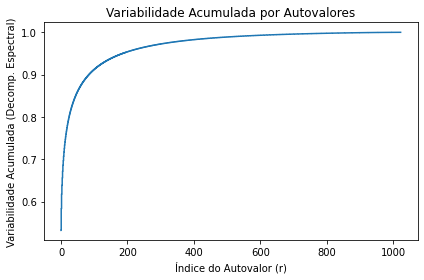

In [15]:
soma_autovalores = sum(autovalores_cov_treino)
var_exp = [(i/soma_autovalores) for i in autovalores_cov_treino]
variabilidade_acumulada = np.cumsum(var_exp)

plt.step(range(0, len(variabilidade_acumulada)), variabilidade_acumulada, where='mid')
plt.ylabel('Variabilidade Acumulada (Decomp. Espectral)')
plt.xlabel('Índice do Autovalor (r)')
plt.title('Variabilidade Acumulada por Autovalores')
plt.tight_layout()
plt.show()

## 10 A partir do gráfico gerado no item anterior, determinar o valor de r, buscando uma solução de compromisso entre um alto valor de variabilidade e um baixo valor de autovalores.

Foi escolhido um valor de 95% de variabilidade acumulada, o que corresponde a um r igual a 185.

In [16]:
r = 185
variabilidade_acumulada_r = round(variabilidade_acumulada[r], 2)
variabilidade_acumulada_r

0.95

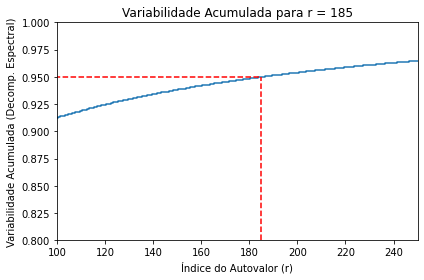

In [38]:
plt.step(range(0, len(variabilidade_acumulada)), variabilidade_acumulada, where='mid')
plt.ylabel('Variabilidade Acumulada (Decomp. Espectral)')
plt.xlabel('Índice do Autovalor (r)')
plt.title('Variabilidade Acumulada para r = 185')
plt.axis([100, 250, 0.8, 1.0])

plt.vlines(x=r, ymin=0.8, ymax=variabilidade_acumulada[r], colors='r',linestyles='dashed')
plt.hlines(y=variabilidade_acumulada[r], xmin=70, xmax=r, colors='r',linestyles='dashed')

plt.tight_layout()
plt.show()

## 11 Utilizando o valor de r escolhido no item anterior, calcular a matriz $\hat Q$ $n \times r$, cujas colunas são as r primeiras colunas de Q.

In [18]:
Q_r = autovetores_cov_treino[:, :r]

## 12 Para o valor de r escolhido, calcular as componentes principais dos dados de treinamento e de teste.

In [19]:
def componentes_principais(matriz):
    return np.matmul(matriz, Q_r)

In [20]:
Z_train = componentes_principais(X_train)
Z_test = componentes_principais(X_test)

## 13 Utilizando as equações do item anterior, o algoritmo de classificação do vizinho mais próximo (K-NN, com k = 1) e a distância euclidiana, classificar os dados de teste. Calcular a acurácia.

In [21]:
def run_knn_model(k=1):
    # a métrica default é a distância euclidiana
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(Z_train, y_train)
    y_pred = model.predict(Z_test)
    return accuracy_score(y_test, y_pred)

In [22]:
print(f'Acurácia: {run_knn_model()}')

Acurácia: 0.7044166666666667


## 14 Repetir o procedimento de classificação descrito acima com cada valor de r. Gerar um gráfico de acurácia por número de autovalores.

In [23]:
# # comentada para não rodar novamente
# # demora aproximadamente 1h30
# # valores foram salvos em um txt: accuracy_list.txt

# accuracy_list = []

# # converter o array para np.float32 para acelerar os cálculos
# # porém gera menos precisão
# X_train = X_train.astype(np.float32)

# for r in range(1024):
#     Q_r = autovetores_cov_treino[:, :r+1].astype(np.float32)
#     Z_train = componentes_principais(X_train)
#     Z_test = componentes_principais(X_test)
#     acuracia = run_knn_model()
#     accuracy_list.append(acuracia)
#     print(r+1) # para acompanhar em qual iteração está

In [24]:
# # salvando a lista em um arquivo com as acurácias
# with open('accuracy_list.txt', 'w') as fp:
#     for item in accuracy_list:
#         fp.write("%s\n" % item)
# print('Terminado')

In [25]:
# lendo a lista

accuracy_list = []

with open('accuracy_list.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        accuracy_list.append(x)

acuracia = [float(i) for i in accuracy_list]

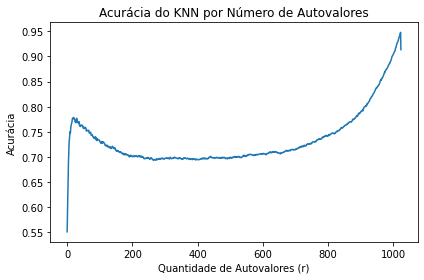

In [26]:
plt.plot(acuracia)
plt.ylabel('Acurácia')
plt.xlabel('Quantidade de Autovalores (r)')
plt.title('Acurácia do KNN por Número de Autovalores')
plt.tight_layout()
plt.show()

## 15 A partir do gráfico de acurácia por número de autovalores, repetir o procedimento de classificação para r correspondente ao melhor valor de acurácia.

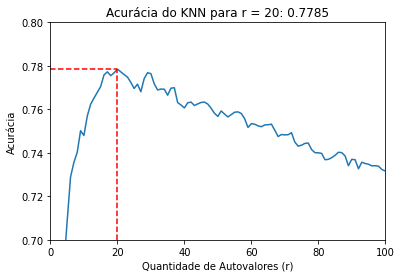

In [41]:
plt.plot(acuracia)
plt.ylabel(f'Acurácia')
plt.xlabel('Quantidade de Autovalores (r)')
plt.title(f'Acurácia do KNN para r = 20: {acuracia[20]}')
plt.axis([0, 100, 0.7, 0.8])

plt.vlines(x=20, ymin=0.7, ymax=acuracia[20], colors='r', linestyles='dashed')
plt.hlines(y=acuracia[20], xmin=0, xmax=20, colors='r', linestyles='dashed')

plt.show()

r = 20

In [43]:
r = 20
Q_r = autovetores_cov_treino[:, :r+1]
Z_train = componentes_principais(X_train)
Z_test = componentes_principais(X_test)
print(f'Acurácia: {run_knn_model()}')

Acurácia: 0.7785


## 16 Calcular a SVD da matriz de dados de treinamento.

Aqui o parâmetro `full_matrices` deve ser `False`, porque queremos a SVD reduzida.

In [24]:
# relendo os dados para limpar as variáveis
dados = pd.read_parquet("https://github.com/diascarolina/fundamentos-analise-dados/blob/main/trabalho02_classificacao/df_total.parquet?raw=true")
dados = dados.sample(frac=1, random_state=12).reset_index(drop=True)

X = dados.drop(['arquivo', 'classe'], axis=1)
y = dados['classe']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=12)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

X_train = center_matrix(X_train)
X_test = center_matrix(X_test)

In [25]:
U, S, VT = np.linalg.svd(X_train, full_matrices=False)

In [26]:
# conferir o cálculo, deve ser True
np.allclose(X_train, np.dot(U * S, VT))

True

## 17 Repetir os passos de 7 a 15, adaptando-os previamente da Decomposição Espectral para a SVD.

## 17.7 Ordenar os autovalores da matriz de covariância dos dados em ordem decrescente.

## 17.8 Ordenar as colunas de Q de acordo com a ordenação dos autovalores feita no item anterior.

Os valores singulares já vem em [ordem decrescente](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html#:~:text=sorted%20in%20descending%20order) em S.

In [27]:
valores_singulares_treino_svd = S
# para obter os autovalores, elevamos os sigmas ao quadrado
autovalores_treino_svd = np.square(S)
autovetores_treino_svd = VT.T

## 17.9 Gerar o gráfico de variabilidade acumulada (no eixo das ordenadas) por número de autovalores (no eixo das abscissas).

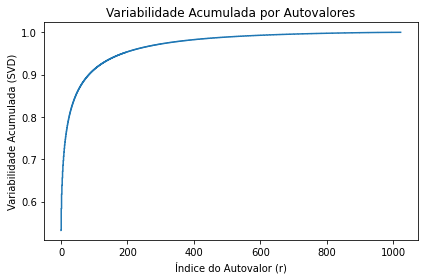

In [28]:
soma_autovalores_svd = sum(autovalores_treino_svd)
var_exp_svd = [(i/soma_autovalores_svd) for i in autovalores_treino_svd]
variabilidade_acumulada_svd = np.cumsum(var_exp_svd)

plt.step(range(0, len(variabilidade_acumulada_svd)), variabilidade_acumulada_svd, where='mid')
plt.ylabel('Variabilidade Acumulada (SVD)')
plt.xlabel('Índice do Autovalor (r)')
plt.title('Variabilidade Acumulada por Autovalores')
plt.tight_layout()
plt.show()

## 17.10 A partir do gráfico gerado no item anterior, determinar o valor de r, buscando uma solução de compromisso entre um alto valor de variabilidade e um baixo valor de autovalores.

In [29]:
r = 185
variabilidade_acumulada_svd_r = round(variabilidade_acumulada_svd[r], 2)
variabilidade_acumulada_svd_r

0.95

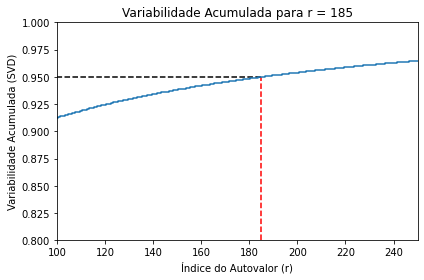

In [30]:
plt.step(range(0, len(variabilidade_acumulada_svd)), variabilidade_acumulada_svd, where='mid')
plt.ylabel('Variabilidade Acumulada (SVD)')
plt.xlabel('Índice do Autovalor (r)')
plt.title('Variabilidade Acumulada para r = 185')
plt.axis([100, 250, 0.8, 1.0])

plt.vlines(x=r, ymin=0.8, ymax=variabilidade_acumulada_svd[r], colors='r',linestyles='dashed')
plt.hlines(y=variabilidade_acumulada_svd[r], xmin=70, xmax=r, colors='k',linestyles='dashed')

plt.tight_layout()
plt.show()

## 17.11 Utilizando o valor de r escolhido no item anterior, calcular a matriz $\hat V$ $n \times r$, cujas colunas são as r primeiras colunas de V.

In [31]:
V_r = autovetores_treino_svd[:, :r]

## 17.12 Para o valor de r escolhido, calcular as componentes principais dos dados de treinamento e de teste.

In [32]:
def componentes_principais_svd(matriz):
    return np.matmul(matriz, V_r)

In [33]:
Z_train = componentes_principais_svd(X_train)
Z_test = componentes_principais_svd(X_test)

## 17.13 Utilizando as equações do item anterior, o algoritmo de classificação do vizinho mais próximo (K-NN, com k = 1) e a distância euclidiana, classificar os dados de teste. Calcular a acurácia.

In [34]:
print(f'Acurácia: {run_knn_model()}')

Acurácia: 0.93825


## 17.14 Repetir o procedimento de classificação descrito acima com cada valor de r. Gerar um gráfico de acurácia por número de autovalores.

In [36]:
# comentada para não rodar novamente
# demora aproximadamente 1h30
# valores foram salvos em um txt: accuracy_list_svd.txt

accuracy_list_svd = []

# converter o array para np.float32 para acelerar os cálculos
# porém gera menos precisão
X_train = X_train.astype(np.float32)

for r in range(1024):
    V_r = autovetores_treino_svd[:, :r+1].astype(np.float32)
    Z_train = componentes_principais_svd(X_train)
    Z_test = componentes_principais_svd(X_test)
    acuracia_svd = run_knn_model()
    accuracy_list_svd.append(acuracia_svd)
    print(r+1) # para acompanhar em qual iteração está

1
2
3
4
5
6
7
8
9
10


In [ ]:
# salvando a lista em um arquivo com as acurácias
with open('accuracy_list_svd.txt', 'w') as fp:
    for item in accuracy_list_svd:
        fp.write("%s\n" % item)
print('Terminado')

In [ ]:
# lendo a lista

accuracy_list_svd = []

with open('accuracy_list_svd.txt', 'r') as fp:
    for line in fp:
        x = line[:-1]
        accuracy_list_svd.append(x)

accuracy_svd = [float(i) for i in accuracy_list_svd]

In [ ]:
plt.plot(accuracy_svd)
plt.ylabel('Acurácia')
plt.xlabel('Quantidade de Autovalores (r)')
plt.title('Acurácia do KNN por Número de Autovalores')
plt.tight_layout()
plt.show()

## 17.15 A partir do gráfico de acurácia por número de autovalores, repetir o procedimento de classificação para r correspondente ao melhor valor de acurácia.